# Loading the dataset

In [2]:
# %pip install seaborn
# %pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [17]:
dataset = pd.read_csv('url_dataset.csv')
# dataset = dataset.drop_duplicates(keep='first')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,no_of_dots,specialSymbol,lengthOfURL,suspiciousWords,prefixSuffix,countOfHttp,shorteningService,has_data_uri,check_ssl_certificate,fake_login_form,...,missingHyperlink,count_foreign_links,count_empty_links,count_error_links,count_redirection_links,has_foreign_css,check_favicon,google_index,httpDomain,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
2,1,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,0,0,0,0,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
4,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
597,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
598,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,0,0,1


# Data Visualization

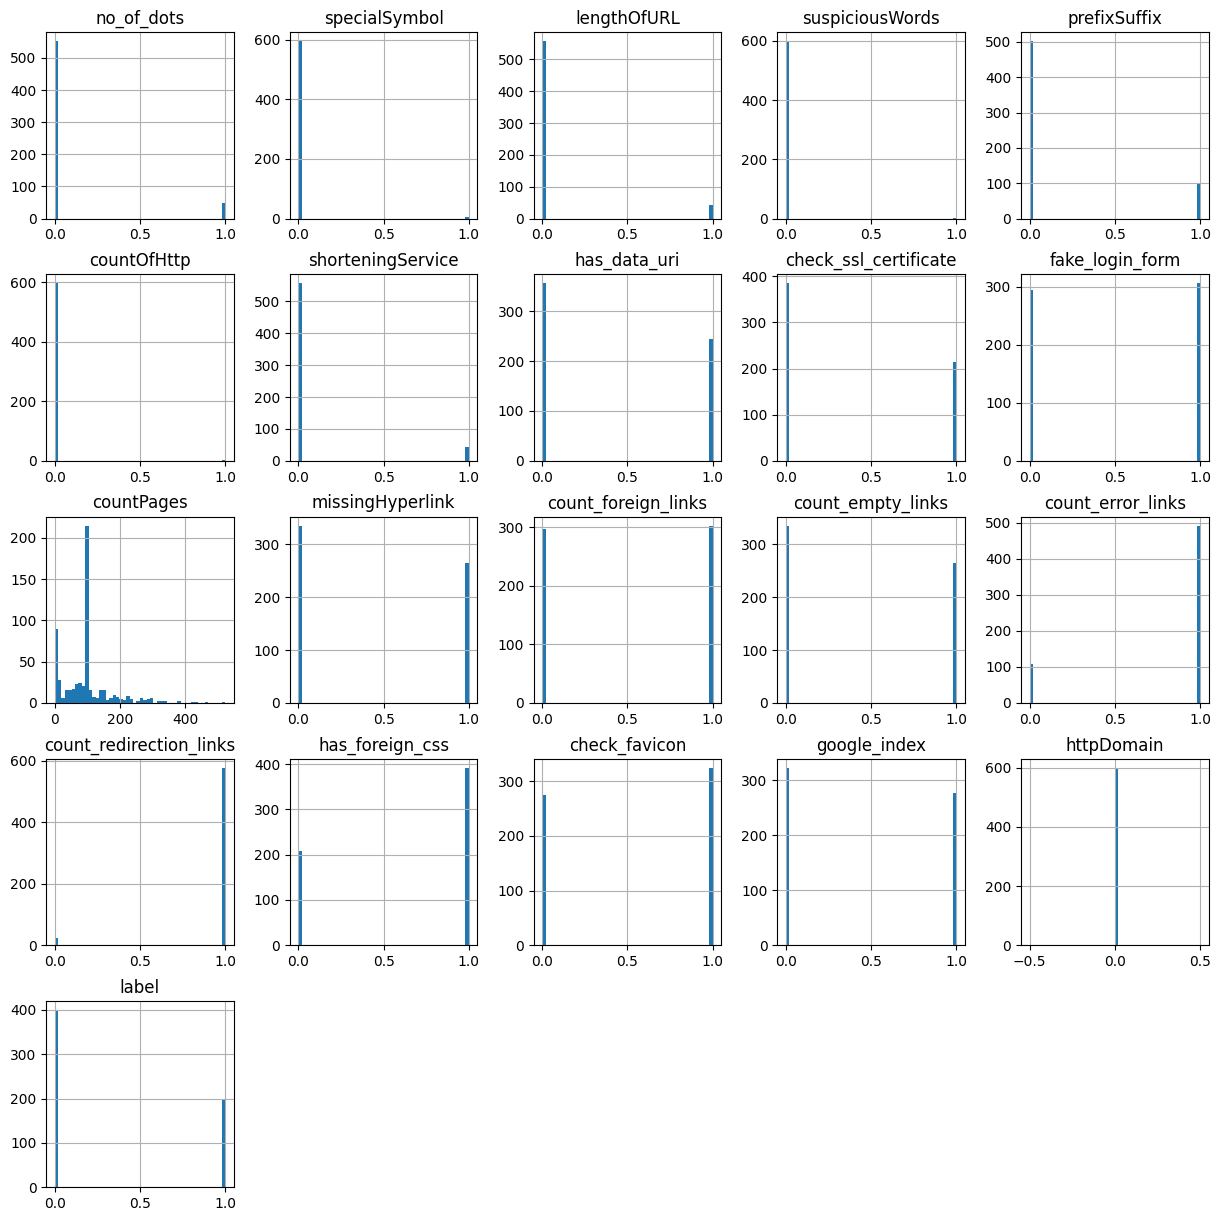

In [18]:
dataset.hist(bins = 50, figsize=(15,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

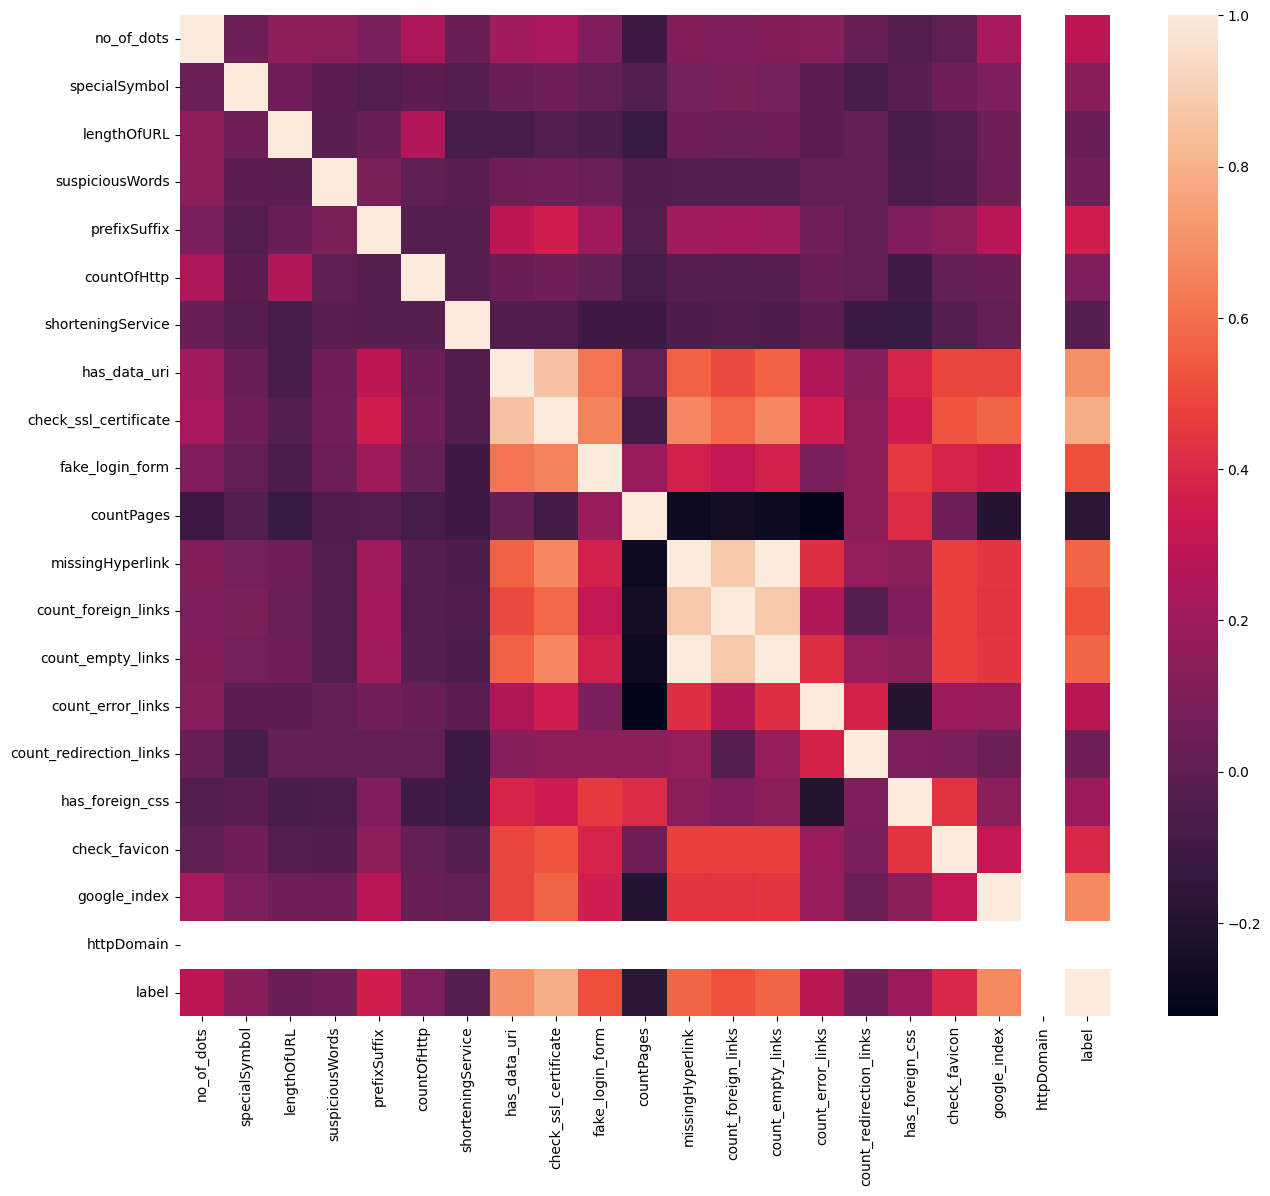

In [19]:
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show

# Preprocessing

In [20]:
# %pip install scikit-learn
from sklearn.model_selection import train_test_split

dataset = dataset.sample(frac=1).reset_index(drop=True)

X = dataset.drop('label', axis=1)
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

# Models and Training

## 1. Decision Tree

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

joblib.dump(tree, "./Frontend/prediction/tree.pkl")

Decision Tree: Accuracy on training Data: 0.940
Decision Tree: Accuracy on test Data: 0.917


['./Frontend/prediction/tree.pkl']

## 2. Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=3)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [36]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

joblib.dump(forest, "./Frontend/prediction/forest.pkl")

Random forest: Accuracy on training Data: 0.912
Random forest: Accuracy on test Data: 0.900


['./Frontend/prediction/forest.pkl']

## 3. Support Vector Machines

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=15)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=15)

In [37]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

joblib.dump(svm, "./Frontend/prediction/svm.pkl")

SVM: Accuracy on training Data: 0.940
SVM : Accuracy on test Data: 0.928


['./Frontend/prediction/svm.pkl']

## 4. KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)

acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))

joblib.dump(knn, "./Frontend/prediction/knn.pkl")

KNN: Accuracy on training Data: 0.924
KNN: Accuracy on test Data: 0.917


['./Frontend/prediction/knn.pkl']